In [9]:
import os
import numpy as np
import pandas as pd

# Path to the original .npz file
npz_path = 'Results/FCNN_encoder_confounder_free_plots/test_results.npz'

# Load data
data = np.load(npz_path)
labels_flat = data["labels"].squeeze()

# Create DataFrame
df = pd.DataFrame({
    "sample_id": data["sample_ids"],
    "label": labels_flat,
    "pred_prob": data["pred_probs"]
})

# Create CSV path by replacing .npz with .csv
csv_path = 'Results/FCNN_encoder_confounder_free_plots/test_results.csv'

# Save DataFrame to CSV
df.to_csv(csv_path, index=False)

print(f"CSV saved to: {csv_path}")


CSV saved to: Results/FCNN_encoder_confounder_free_plots/test_results.csv


In [16]:
import os
import numpy as np
import pandas as pd

# Path to the original .npz file
npz_path = 'Results/FCNN_plots/test_results.npz'

# Load data
data = np.load(npz_path)

# Ensure all arrays are 1D
sample_ids = data["sample_ids"].reshape(-1)
labels_flat = data["labels"].reshape(-1)
pred_probs = data["pred_probs"].reshape(-1)

# Create DataFrame
df = pd.DataFrame({
    "sample_id": sample_ids,
    "label": labels_flat,
    "pred_prob": pred_probs
})

# Optional: add predicted class
df["pred_label"] = (df["pred_prob"] > 0.5).astype(int)

# Save to CSV
csv_path = os.path.splitext(npz_path)[0] + ".csv"
df.to_csv(csv_path, index=False)

print(f"CSV saved to: {csv_path}")


CSV saved to: Results/FCNN_plots/test_results.csv


In [10]:
import pandas as pd

# File paths
model_results_path = "Results/FCNN_encoder_confounder_free_plots/test_results.csv"
metadata_path = "dataset/MetaCardis_data/test_T2D_metadata.csv"  # Replace with actual metadata CSV path
output_path = "Results/FCNN_encoder_confounder_free_plots/test_results_with_metadata.csv"

# Load both CSVs
model_df = pd.read_csv(model_results_path)
metadata_df = pd.read_csv(metadata_path)

# Merge on SampleID (metadata) and sample_id (model results)
merged_df = pd.merge(
    model_df,
    metadata_df[["SampleID", "METFORMIN_C", "PATGROUPFINAL_C"]],
    how="left",
    left_on="sample_id",
    right_on="SampleID"
)

# Drop the redundant SampleID column (optional)
merged_df.drop(columns=["SampleID"], inplace=True)

# Save to CSV
merged_df.to_csv(output_path)


In [17]:
import pandas as pd

# File paths
model_results_path = "Results/FCNN_plots/test_results.csv"
metadata_path = "dataset/MetaCardis_data/test_T2D_metadata.csv"  # Replace with actual metadata CSV path
output_path = "Results/FCNN_plots/test_results_with_metadata.csv"

# Load both CSVs
model_df = pd.read_csv(model_results_path)
metadata_df = pd.read_csv(metadata_path)

# Merge on SampleID (metadata) and sample_id (model results)
merged_df = pd.merge(
    model_df,
    metadata_df[["SampleID", "METFORMIN_C", "PATGROUPFINAL_C"]],
    how="left",
    left_on="sample_id",
    right_on="SampleID"
)

# Drop the redundant SampleID column (optional)
merged_df.drop(columns=["SampleID"], inplace=True)

# Save to CSV
merged_df.to_csv(output_path)


In [11]:
import pandas as pd

# Load your CSV
df = pd.read_csv("Results/FCNN_encoder_confounder_free_plots/test_results_with_metadata.csv")  # Replace with actual file path

# Add predicted label column using a threshold (e.g., 0.5)
df["pred_label"] = (df["pred_prob"] > 0.5).astype(int)

# Save back to CSV (overwrite or new file)
df.to_csv("Results/FCNN_encoder_confounder_free_plots/test_results_with_metadata.csv", index=False)

# Preview
print(df.head())


   Unnamed: 0   sample_id  label  pred_prob  METFORMIN_C  PATGROUPFINAL_C  \
0           0  x30MCx1993    0.0   0.127570            0                0   
1           1  x30MCx2041    0.0   0.131861            0                0   
2           2  x30MCx2099    0.0   0.553909            0                0   
3           3  x30MCx2318    1.0   0.888216            1                1   
4           4  x30MCx1569    0.0   0.142840            0                0   

   pred_label  
0           0  
1           0  
2           1  
3           1  
4           0  


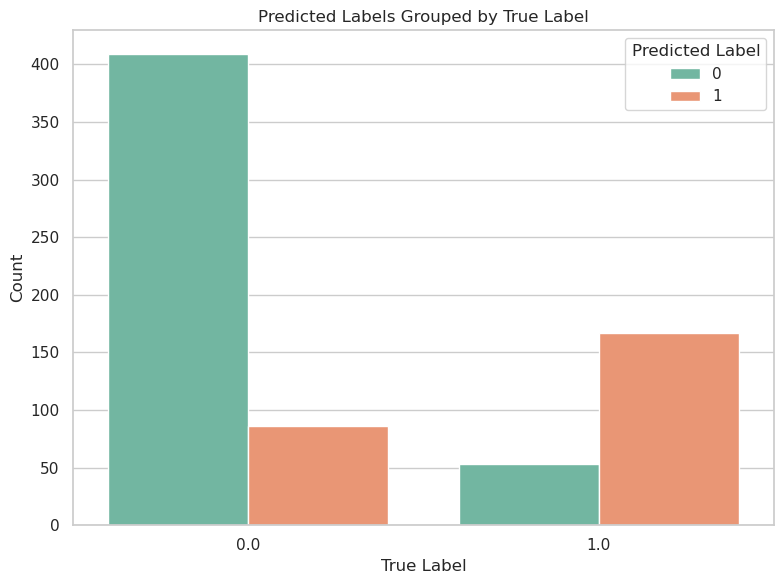

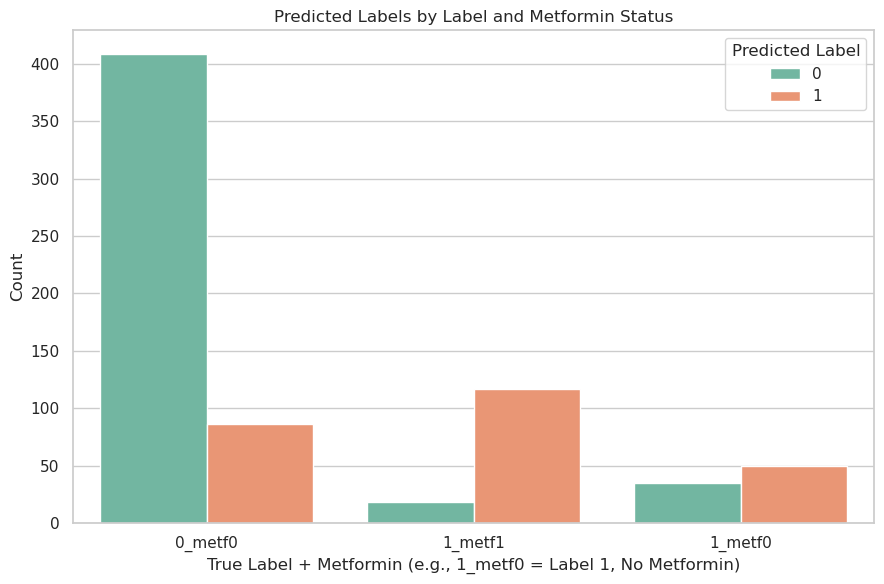

In [14]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace with your actual file path)
df = pd.read_csv("Results/FCNN_encoder_confounder_free_plots/test_results_with_metadata.csv")  # e.g., "Results/test_results.csv"

# Add predicted label column if not already present
if "pred_label" not in df.columns:
    df["pred_label"] = (df["pred_prob"] > 0.5).astype(int)

# Create a combined category column for label + metformin
df["label_metformin"] = df["label"].astype(int).astype(str) + "_metf" + df["METFORMIN_C"].astype(int).astype(str)

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Countplot by label only
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", hue="pred_label", palette="Set2", dodge=True)
plt.title("Predicted Labels Grouped by True Label")
plt.xlabel("True Label")
plt.ylabel("Count")
plt.legend(title="Predicted Label")
plt.tight_layout()
plt.show()

# Plot 2: Countplot showing METFORMIN_C effect (combined)
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x="label_metformin", hue="pred_label", palette="Set2", dodge=True)
plt.title("Predicted Labels by Label and Metformin Status")
plt.xlabel("True Label + Metformin (e.g., 1_metf0 = Label 1, No Metformin)")
plt.ylabel("Count")
plt.legend(title="Predicted Label")
plt.tight_layout()
plt.show()


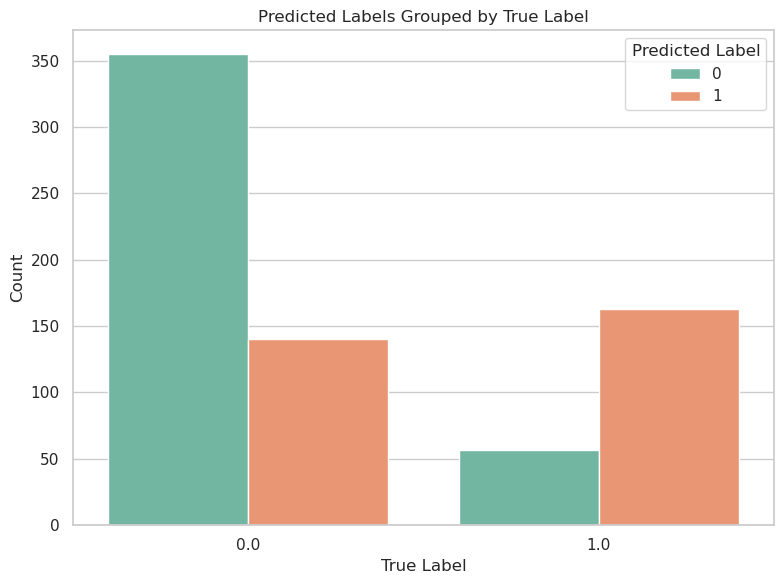

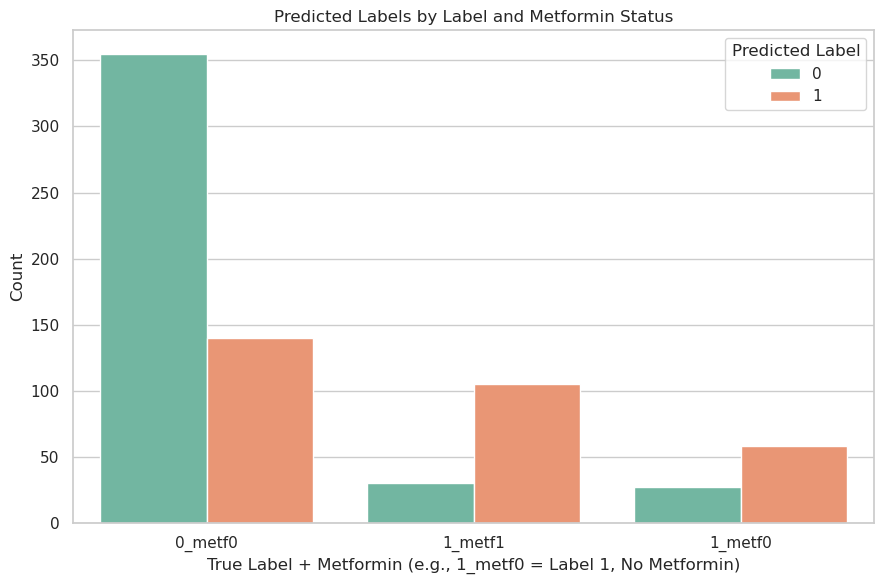

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your data (replace with your actual file path)
df = pd.read_csv("Results/FCNN_plots/test_results_with_metadata.csv")  # e.g., "Results/test_results.csv"

# Add predicted label column if not already present
if "pred_label" not in df.columns:
    df["pred_label"] = (df["pred_prob"] > 0.5).astype(int)

# Create a combined category column for label + metformin
df["label_metformin"] = df["label"].astype(int).astype(str) + "_metf" + df["METFORMIN_C"].astype(int).astype(str)

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Countplot by label only
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x="label", hue="pred_label", palette="Set2", dodge=True)
plt.title("Predicted Labels Grouped by True Label")
plt.xlabel("True Label")
plt.ylabel("Count")
plt.legend(title="Predicted Label")
plt.tight_layout()
plt.show()

# Plot 2: Countplot showing METFORMIN_C effect (combined)
plt.figure(figsize=(9, 6))
sns.countplot(data=df, x="label_metformin", hue="pred_label", palette="Set2", dodge=True)
plt.title("Predicted Labels by Label and Metformin Status")
plt.xlabel("True Label + Metformin (e.g., 1_metf0 = Label 1, No Metformin)")
plt.ylabel("Count")
plt.legend(title="Predicted Label")
plt.tight_layout()
plt.show()
